# House Price linear regression Project

In [ ]:
by using House data we train linear regression and try to predict new outcome

In [ ]:
1. libraries
2. eda
3. assumption
    1. Linearity
    2. No multicolinearity

In [ ]:
1. libraries
2. data gathering
3. eda
4. assumption
5. training and testing
6. model train
7. evaluation
8. check on new data

## 1. Problem statement

In [ ]:
by using House data we train linear regression and try to predict new outcome

## 2. Libreries import

In [191]:
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Linear regression import
from sklearn.linear_model import LinearRegression

# train-test-split
from sklearn.model_selection import train_test_split     #(train, test)

# evaluation metrics
from sklearn.metrics  import r2_score, mean_squared_error

# vif (no multicolinearity)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# scipy.stats as stats
import scipy.stats as stats    # if we want any statistic model that time we can aslo use scipy.stats or your can use numpy stats function

In [ ]:
r_squared       >> best fit line
range  >> 0-1
r>0.7           >> best algorith 
r<0.3 and r<0.7 >> moderate algorith
r<0.3           >> algorith is not best

In [ ]:
sklearn >> sckit-learn
linear_model   >> LinearRegression, LogisticRegression

100%  (1000)      # model_selection
training = 80 - 800   # r^2 >> 
testing  = 20 - 200

evaluation metrics
best fit line
mse  >> mean_squared_error   ()
r_squared
rmse

# 3. Data Gathering

In [193]:
# load the csv data by using pandas

# y = 'price'                       # dependent column   target column
# x = ['area','bedrooms', 'age']    # independent columns

df = pd.read_csv("housing_5000.csv")
df.head()

# df = pd.read_sql("file")
# pd.read_excel("file")

,area,bedrooms,age,price
0,1660,1,29,262054
1,4572,5,27,705629
2,3892,4,30,586737
3,1266,1,25,178622
4,4244,4,42,649809


# 4. EDA

In [95]:
df.isnull().sum()    # True

area        0
bedrooms    0
age         0
price       0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   area      5000 non-null   int64
 1   bedrooms  5000 non-null   int64
 2   age       5000 non-null   int64
 3   price     5000 non-null   int64
dtypes: int64(4)
memory usage: 156.4 KB


# 5. assumption

In [ ]:
df[i]

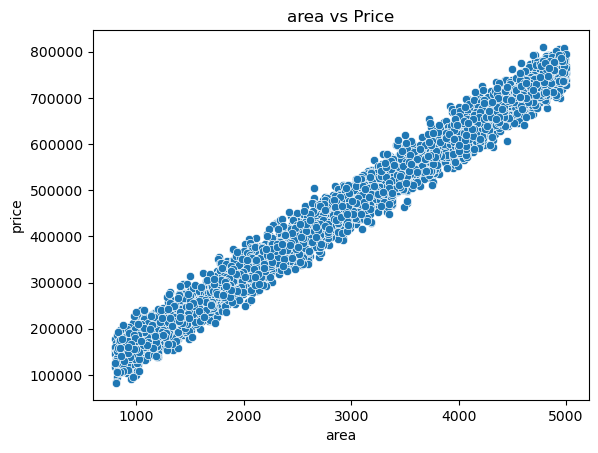

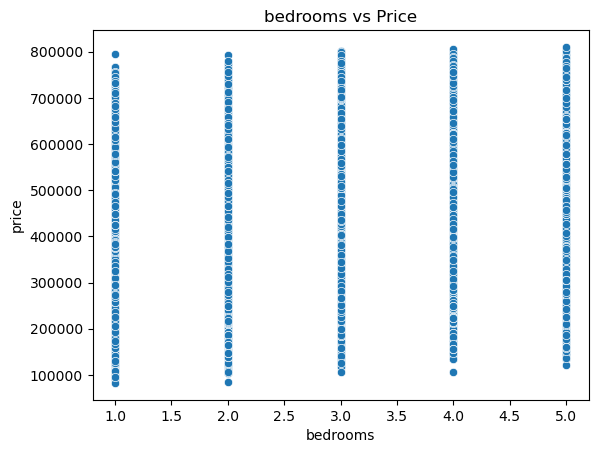

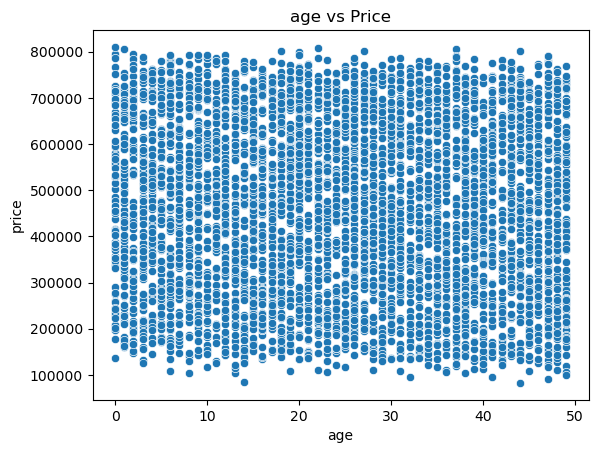

In [195]:
# assumption1 linearity ( feature vs target linearily correlated)

features = ['area','bedrooms', 'age']

for i in features:
    sns.scatterplot(x=df[i], y=df['price'])
    plt.title(f"{i} vs Price")
    plt.show()

In [ ]:
df.corr()              # r value

In [101]:
df.corr()

,area,bedrooms,age,price
area,1.000000,-0.003070,-0.011044,0.990157
bedrooms,-0.003070,1.000000,0.005294,0.074168
age,-0.011044,0.005294,1.000000,-0.050986
price,0.990157,0.074168,-0.050986,1.000000


In [24]:
df['area'].corr(df['price'])  

# r value is 0.999
r>0.7
# area and price have strong correlation

0.9901565695200935

In [26]:
df['bedrooms'].corr(df['price'])  
# r values is 0.07
# it is not good

0.07416807137850269

In [28]:
df['age'].corr(df['price'])  
# r vlaues is not good

-0.050986340474560236

In [ ]:
# 2. no multicoliearity

features = ['area','bedrooms', 'age']
vif = 1    >> no correlation
vif = 5    >> moderate correlation
vif >= 10  >> highly correlation between 2 or more independent variable

In [32]:
features = ['area','bedrooms', 'age']
x_temp = df[features]         # we create data frame
vif_data = pd.DataFrame()

vif_data['features'] = x_temp.columns
vif_dat

,features
0,area
1,bedrooms
2,age


In [79]:
features = ['area','bedrooms', 'age']
x_temp = df[features]
vif_data = pd.DataFrame()
vif_data['features'] = x_temp.columns

vif=[variance_inflation_factor(x_temp.values, i) for i in range(0,x_temp.shape[1])]
vif_data["vif"] = vif

In [81]:
vif_data

,features,vif
0,area,4.006158
1,bedrooms,3.747180
2,age,3.125617


In [85]:
x_temp.shape[1]

3

In [44]:
(5000, 3)

3

In [87]:
features = ['area','bedrooms', 'age']
x_temp = df[features]
vif_data = pd.DataFrame()
vif_data['features'] = x_temp.columns

vif=[variance_inflation_factor(x_temp.values, i) for i in range(0,3)]
vif_data["vif"] = vif

In [155]:
features = ['area','bedrooms', 'age']
x_temp = df[features]
vif_data = pd.DataFrame()
vif_data['features'] = x_temp.columns

for i in range(0,x_temp.shape[1]):
    vif = variance_inflation_factor(x_temp.values, i)
    vif_data['vif']=vif

In [157]:
vif_data

,features,vif
0,area,3.125617
1,bedrooms,3.125617
2,age,3.125617


In [123]:
x_temp.values

array([[1660,    1,   29],
       [4572,    5,   27],
       [3892,    4,   30],
       ...,
       [1833,    4,   31],
       [3281,    1,   26],
       [ 924,    5,   32]], dtype=int64)

In [ ]:
[[1,2,3],[11,22,33],[10,20,30]]


In [141]:
x_temp.head(2)

,area,bedrooms,age
0,1660,1,29
1,4572,5,27


In [139]:
x_temp.values
# [[],[],[]]

array([[1660,    1,   29],
       [4572,    5,   27],
       [3892,    4,   30],
       ...,
       [1833,    4,   31],
       [3281,    1,   26],
       [ 924,    5,   32]], dtype=int64)

In [159]:
features = ['area','bedrooms', 'age']
x_temp = df[features]
vif_data = pd.DataFrame()
vif_data['features'] = x_temp.columns

vif_data['vif']=[variance_inflation_factor(x_temp.values, i) for i in range(0,x_temp.shape[1])]


In [161]:
vif_data

,features,vif
0,area,4.006158
1,bedrooms,3.747180
2,age,3.125617


# 5 Train-test split

In [ ]:
100
80 train
20 test

In [197]:
x = df[['area','bedrooms', 'age']]   # 80 train, 20 test
y = df['price']                      # 80 train, 20 test

In [ ]:
100
test_size = 0.2   20%
x = t_train, x_test
y = y_train, y_test

random_state = 42(True)   between 1,99

In [199]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state=42)

In [201]:
x_test

,area,bedrooms,age
1501,2833,2,45
2586,2663,1,22
2653,3142,4,26
1055,1414,3,16
705,809,5,10
...,...,...,...
4711,1278,4,24
2313,2099,2,43
3214,4142,2,10
2732,4037,4,22


In [183]:
x_train.head(1)     721396

,area,bedrooms,age
4227,4842,2,31


In [185]:
y_train

4227    721396
4676    291293
800     557759
3671    754241
4193    292600
         ...  
4426    540891
466     680421
3092    181084
3772    577127
860     505008
Name: price, Length: 4000, dtype: int64

# step 6 Train the model

In [ ]:
fit   >> we just store data or we give data for traing

In [203]:
model = LinearRegression()
model.fit(x_train, y_train)         # our model is train

LinearRegression()

## 7 evaluation

In [ ]:
x_train, y_train
x_test , y_test

r2   > 0-1   > 0.7
msc

In [ ]:
training
testing

array([731087.16091403, 275013.3363762 , 547663.2113464 , ...,
       181291.93807519, 566698.58550591, 477607.6562504 ])

In [219]:
y_train    #

4227    721396
4676    291293
800     557759
3671    754241
4193    292600
         ...  
4426    540891
466     680421
3092    181084
3772    577127
860     505008
Name: price, Length: 4000, dtype: int64

In [221]:
# we want to calculated y_pred
y_pred = model.predict(x_train)

accuracy_train = r2_score(y_train,y_pred)
print("accuracy for train :-",accuracy_train)

mse = mean_squared_error(y_train,y_pred)
print("mean squared error for train is :-",mse)

rmse = np.sqrt(mse)
print("rmse :-",rmse)

accuracy for train :- 0.9879649042128996
mean squared error for train is :- 401901641.9119612
rmse :- 20047.48467793307


In [225]:
y_pred

array([731087.16091403, 275013.3363762 , 547663.2113464 , ...,
       181291.93807519, 566698.58550591, 477607.6562504 ])

In [223]:
y_train

4227    721396
4676    291293
800     557759
3671    754241
4193    292600
         ...  
4426    540891
466     680421
3092    181084
3772    577127
860     505008
Name: price, Length: 4000, dtype: int64

In [227]:
# evaluation on testing
y_pred_test = model.predict(x_test)

accuracy_test = r2_score(y_test, y_pred_test)
print("accuracy_test is :-",accuracy_test)

mse_test = mean_squared_error(y_test, y_pred_test)
print("mse test is :-",mse_test)

rmse_test = np.sqrt(mse_test)
print("rmse test is :-",rmse_test)

accuracy_test is :- 0.9881649565155366
mse test is :- 398100103.67941445
rmse test is :- 19952.446057549296


In [ ]:
train = 0.987
test  = 0.988
good model

# overfitting and under fitting

In [ ]:
train = 0.987
test  = 0.688

# try to prediction on new data

In [232]:
features

['area', 'bedrooms', 'age']

In [242]:
new_data = pd.DataFrame([[3756,3,10]], columns = features)
new_data

,area,bedrooms,age
0,3756,3,10


In [244]:
predicted_price = model.predict(new_data)
print("predicted price for new house is :-",predicted_price[0])

predicted price for new house is :- 588635.3940750542


In [246]:
predicted_price

array([588635.39407505])

In [248]:
list1 = [12]
list1[0]

12